     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2  1456940                                            Level Z   
3   108600                                    Project Zomboid   
4  1809540                                          Nine Sols   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2      DogHowl Games  Creative Black Chair         NaN         0         0   
3    The Indie Stone       The Indie Stone         NaN    281805     17554   
4     RedCandleGames        RedCandleGames         NaN      3989       262   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

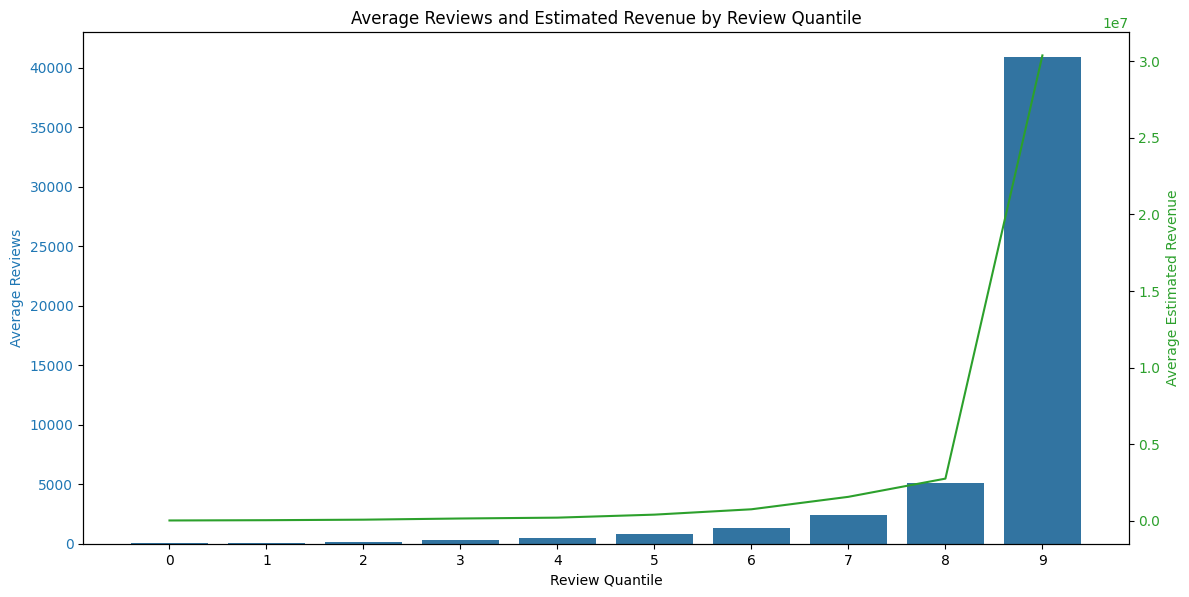

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Reduce the number of quantiles if there are not enough unique values
num_quantiles = min(10, unique_reviews)

# Calculate quantiles for reviews and estimated revenue
if num_quantiles > 1:
    games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')
    games_df['revenue_quantile'] = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=False, duplicates='drop')

    # Group by review quantile and calculate statistics
    review_stats = games_df.groupby('review_quantile').agg({
        'reviews': ['mean', 'median'],
        'estimated_revenue': ['mean', 'median'],
        'price': ['mean', 'median']
    }).reset_index()

    review_stats.columns = ['review_quantile', 'mean_reviews', 'median_reviews', 'mean_estimated_revenue', 'median_estimated_revenue', 'mean_price', 'median_price']

    # Display the statistics
    print(review_stats)

    # Data Visualization
    # Plot average reviews and estimated revenue by review quantile
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Review Quantile')
    ax1.set_ylabel('Average Reviews', color=color)
    sns.barplot(x=review_stats['review_quantile'], y=review_stats['mean_reviews'], ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Average Estimated Revenue', color=color)
    sns.lineplot(x=review_stats['review_quantile'], y=review_stats['mean_estimated_revenue'], ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Average Reviews and Estimated Revenue by Review Quantile')
    plt.show()
else:
    print("Not enough unique review values to create quantiles.")



     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2   108600                                    Project Zomboid   
3  1456940                                            Level Z   
4  2625510                              Don't Scream Together   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2    The Indie Stone       The Indie Stone         NaN    281805     17554   
3      DogHowl Games  Creative Black Chair         NaN         0         0   
4                NaN                   NaN         NaN         0         0   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

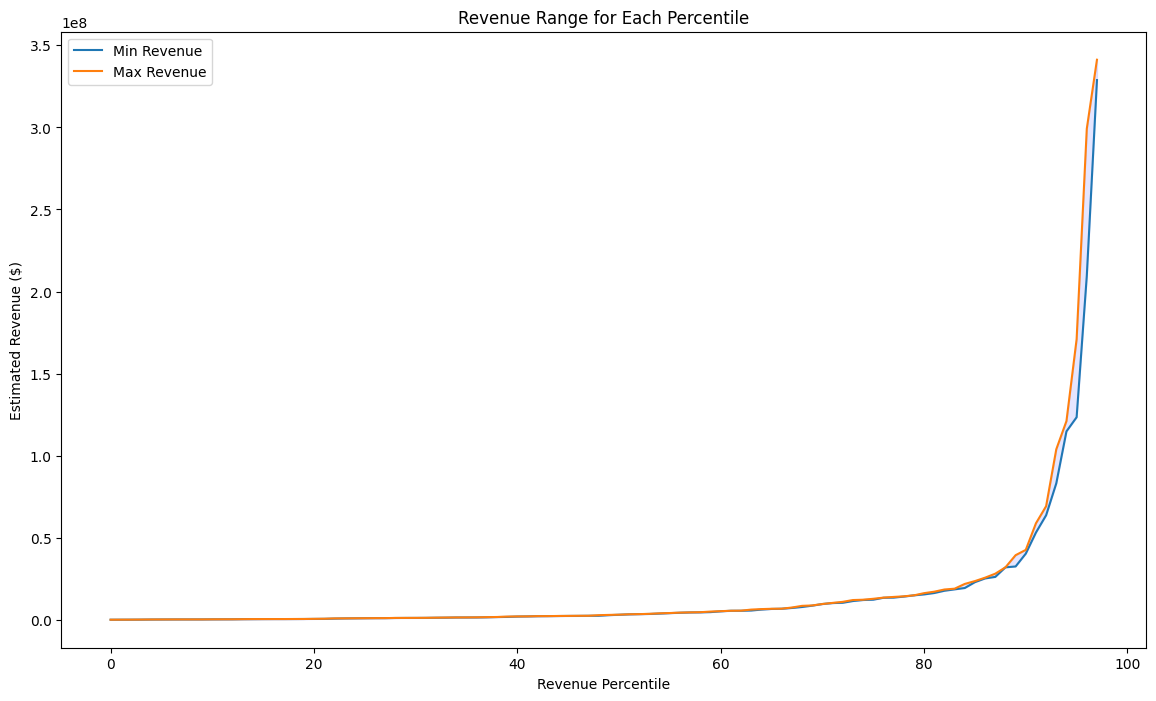

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Calculate quantiles for estimated revenue
num_quantiles = 100  # Divide into percentiles
games_df['revenue_percentile'] = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=False, duplicates='drop')

# Group by revenue percentile and calculate the revenue range (min and max)
revenue_range = games_df.groupby('revenue_percentile')['estimated_revenue'].agg(['min', 'max']).reset_index()

# Convert revenue range to full numbers
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))

# Display the revenue range for each percentile
print(revenue_range)

# Data Visualization
# Plot the revenue range for each percentile
plt.figure(figsize=(14, 8))
sns.lineplot(data=revenue_range, x='revenue_percentile', y='min', label='Min Revenue')
sns.lineplot(data=revenue_range, x='revenue_percentile', y='max', label='Max Revenue')
plt.fill_between(revenue_range['revenue_percentile'], revenue_range['min'], revenue_range['max'], color='blue', alpha=0.1)
plt.title('Revenue Range for Each Percentile')
plt.xlabel('Revenue Percentile')
plt.ylabel('Estimated Revenue ($)')
plt.legend()
plt.show()


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Filter out rows where estimated revenue is zero
games_df = games_df[games_df['estimated_revenue'] > 0]

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Reduce the number of quantiles if there are not enough unique values
num_quantiles = min(10, unique_reviews)

# Calculate quantiles for reviews
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')

# Group by review quantile and calculate the revenue range (min and max)
revenue_range = games_df.groupby('review_quantile')['estimated_revenue'].agg(['min', 'max']).reset_index()

# Convert revenue range to full numbers and format as strings
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)


# Optionally, print each range individually
for index, row in revenue_range.iterrows():
    print(f"Review Quantile {row['review_quantile']}: {row['range']}")


     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2  1456940                                            Level Z   
3   108600                                    Project Zomboid   
4  1809540                                          Nine Sols   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2      DogHowl Games  Creative Black Chair         NaN         0         0   
3    The Indie Stone       The Indie Stone         NaN    281805     17554   
4     RedCandleGames        RedCandleGames         NaN      3989       262   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

Unique review values: 704
Review Quantile 0: $882 - $339,983
Review Quantile 1: $1,421 - $184,963
Review Quantile 2: $4,092 - $296,901
Review Quantile 3: $10,544 - $372,351
Review Quantile 4: $11,834 - $757,248
Review Quantile 5: $22,746 - $1,282,072
Review Quantile 6: $27,048 - $2,337,720
Review Quantile 7: $143,104 - $4,436,732
Review Quantile 8: $203,000 - $12,003,498
Review Quantile 9: $468,914 - $341,240,604


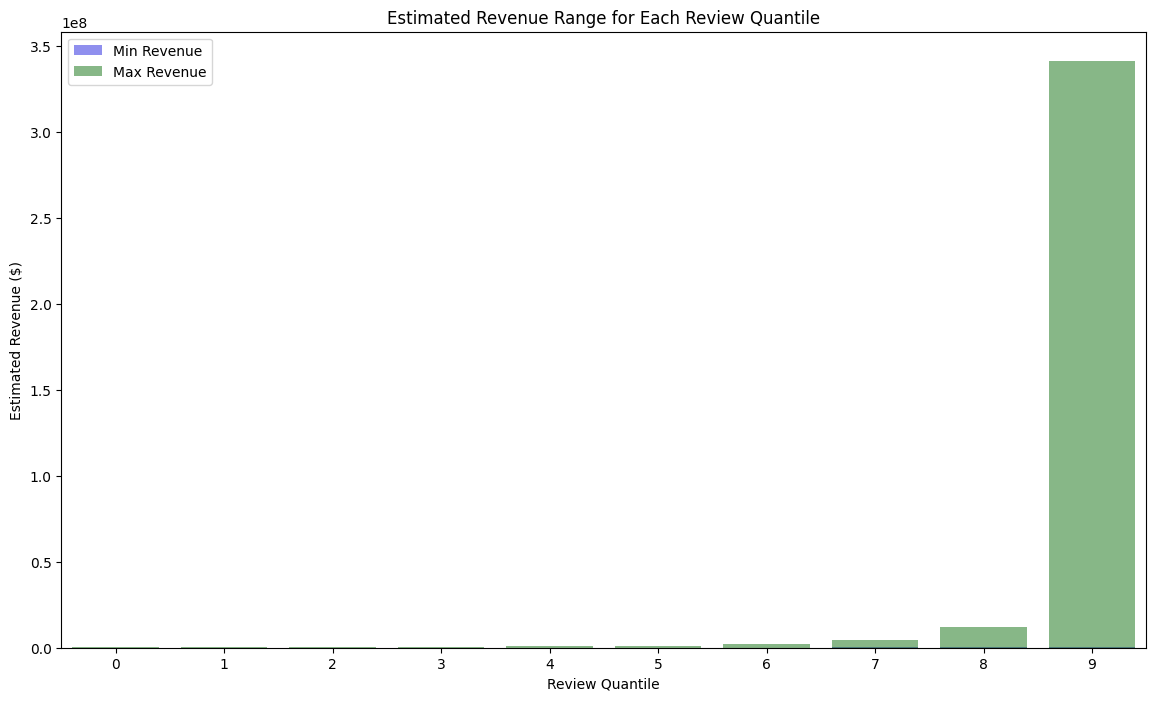

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']
games_df = games_df[games_df['estimated_revenue'] > 0]

# Check the number of unique review counts
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Adjust the number of quantiles based on unique review counts
num_quantiles = min(10, unique_reviews)
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')

# Calculate the revenue range for each quantile
revenue_range = games_df.groupby('review_quantile')['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
for index, row in revenue_range.iterrows():
    print(f"Review Quantile {row['review_quantile']}: {row['range']}")

# Visualize the revenue range
plt.figure(figsize=(14, 8))
sns.barplot(x=revenue_range['review_quantile'], y=revenue_range['min'], color='blue', alpha=0.5, label='Min Revenue')
sns.barplot(x=revenue_range['review_quantile'], y=revenue_range['max'], color='green', alpha=0.5, label='Max Revenue')
plt.xlabel('Review Quantile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Review Quantile')
plt.legend()
plt.show()



Top 10 publishers by number of games:
publisher
Gun Interactive            14
Glowstick Entertainment    12
Artifex Mundi              11
PLAYISM                    10
Chilla's Art               10
tinyBuild                  10
Rusty Lake                  9
Iceberg Interactive         9
Scott Cawthon               8
MangaGamer                  8
Name: count, dtype: int64

Top 10 publishers by number of positive reviews:
publisher
Klei Entertainment            437300
The Indie Stone               281805
Studio Minus                  243688
Annapurna Interactive         239795
Team Salvato                  192225
Scott Cawthon                 176513
Electronic Arts               156128
BANDAI NAMCO Entertainment    130604
Red Hook Studios              125334
Red Barrels                   113190
Name: positive, dtype: int64


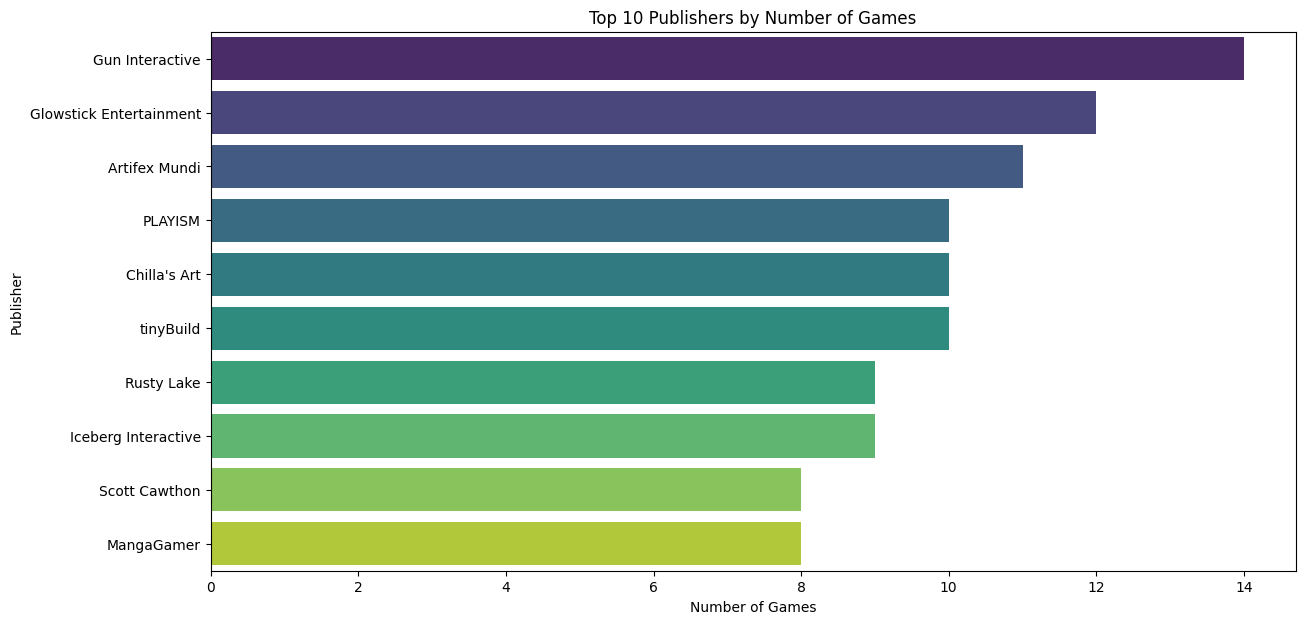

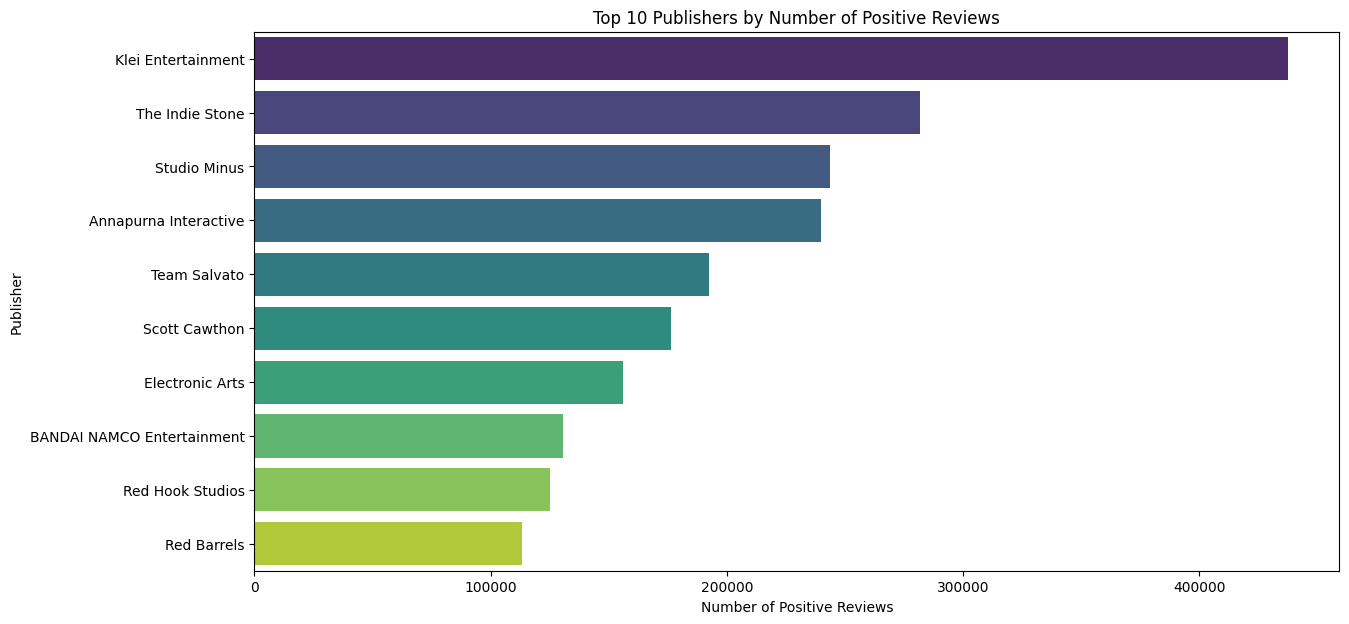

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
data_dir = '../data'
games_df = pd.read_csv(os.path.join(data_dir, 'indie_horror_games_data.csv'))

# Analyze publishers by number of games published
publisher_counts = games_df['publisher'].value_counts()
top_publishers = publisher_counts.head(10)

print("Top 10 publishers by number of games:")
print(top_publishers)

# Analyze publishers by success (using positive reviews as a proxy for success)
publisher_success = games_df.groupby('publisher')['positive'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 publishers by number of positive reviews:")
print(publisher_success)

# Plot the top 10 publishers by number of games published
plt.figure(figsize=(14, 7))
sns.barplot(x=top_publishers.values, y=top_publishers.index, hue=top_publishers.index, dodge=False, palette="viridis", legend=False)
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.show()

# Plot the top 10 publishers by number of positive reviews
plt.figure(figsize=(14, 7))
sns.barplot(x=publisher_success.values, y=publisher_success.index, hue=publisher_success.index, dodge=False, palette="viridis", legend=False)
plt.title('Top 10 Publishers by Number of Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Publisher')
plt.show()

# Save the analysis results
top_publishers.to_csv(os.path.join(data_dir, 'top_publishers_by_games.csv'))
publisher_success.to_csv(os.path.join(data_dir, 'top_publishers_by_success.csv'))


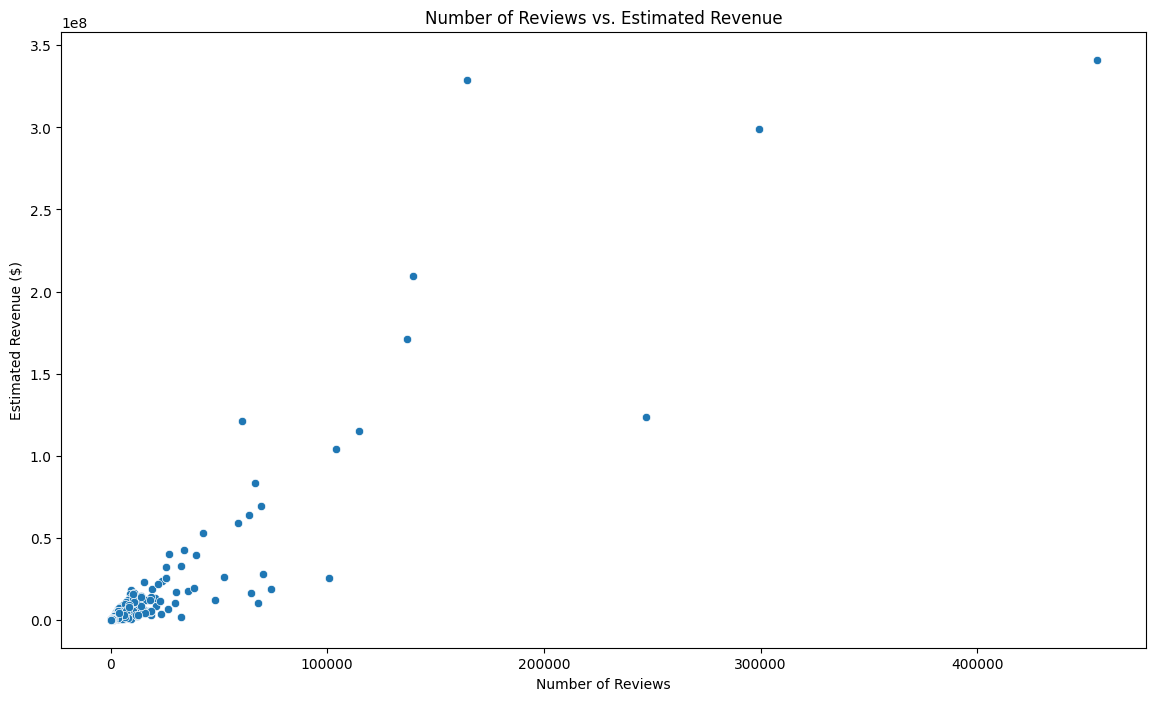

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']
games_df = games_df[games_df['estimated_revenue'] > 0]

# Scatter plot of reviews vs. estimated revenue
plt.figure(figsize=(14, 8))
sns.scatterplot(x=games_df['reviews'], y=games_df['estimated_revenue'])
plt.xlabel('Number of Reviews')
plt.ylabel('Estimated Revenue ($)')
plt.title('Number of Reviews vs. Estimated Revenue')
plt.show()


Unique review values: 766

Review Percentage: 1.0%
Bottom 10%: $1,764 - $679,966
Bottom 20%: $2,842 - $369,926
Bottom 30%: $8,183 - $593,802
Bottom 40%: $21,087 - $744,702
Bottom 50%: $23,667 - $1,514,495
Bottom 60%: $45,493 - $2,564,145
Top 40%: $54,096 - $4,675,441
Top 30%: $286,209 - $8,873,464
Top 20%: $405,999 - $24,006,995
Top 10%: $937,827 - $682,481,209

Review Percentage: 2.0%
Bottom 10%: $882 - $339,983
Bottom 20%: $1,421 - $184,963
Bottom 30%: $4,092 - $296,901
Bottom 40%: $10,544 - $372,351
Bottom 50%: $11,834 - $757,248
Bottom 60%: $22,746 - $1,282,072
Top 40%: $27,048 - $2,337,720
Top 30%: $143,104 - $4,436,732
Top 20%: $203,000 - $12,003,498
Top 10%: $468,914 - $341,240,604

Review Percentage: 5.0%
Bottom 10%: $353 - $135,993
Bottom 20%: $568 - $73,985
Bottom 30%: $1,637 - $118,760
Bottom 40%: $4,217 - $148,940
Bottom 50%: $4,733 - $302,899
Bottom 60%: $9,099 - $512,829
Top 40%: $10,819 - $935,088
Top 30%: $57,242 - $1,774,693
Top 20%: $81,200 - $4,801,399
Top 10%: $187,

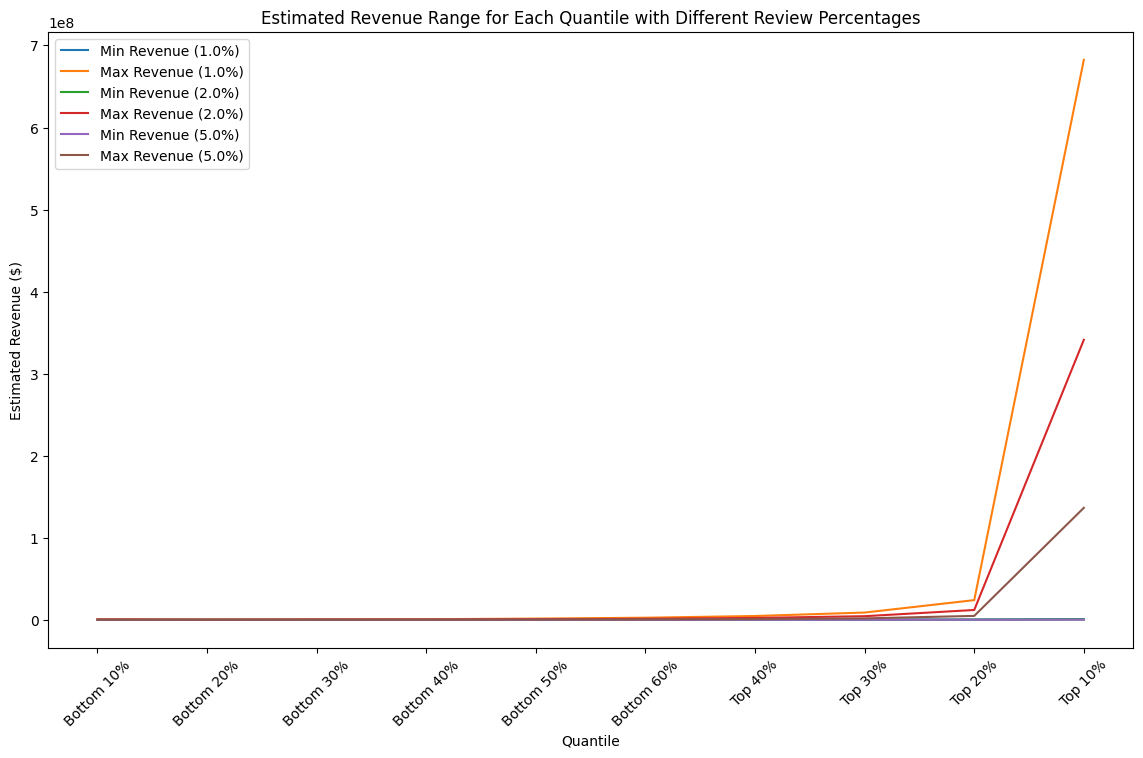

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out games with zero reviews
games_df = games_df[games_df['reviews'] > 0]

# Get the number of unique review values
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Test different review percentages
review_percentages = [0.01, 0.02, 0.05]
results = {}

for review_percentage in review_percentages:
    review_factor = 1 / review_percentage
    games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']
    
    # Filter out games with zero estimated revenue
    games_df = games_df[games_df['estimated_revenue'] > 0]
    
    # Calculate review quantiles
    num_quantiles = min(10, unique_reviews)
    quantile_labels = [f"Bottom {i*10}%" for i in range(1, 7)] + [f"Top {(11-i)*10}%" for i in range(7, 11)]
    games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=quantile_labels, duplicates='drop')

    # Calculate the revenue range for each quantile
    revenue_range = games_df.groupby('review_quantile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
    revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
    revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
    revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)
    
    results[review_percentage] = revenue_range

# Print results for each review percentage
for review_percentage, revenue_range in results.items():
    print(f"\nReview Percentage: {review_percentage * 100}%")
    for index, row in revenue_range.iterrows():
        print(f"{row['review_quantile']}: {row['range']}")

# Visualize the results
plt.figure(figsize=(14, 8))
for review_percentage, revenue_range in results.items():
    plt.plot(revenue_range['review_quantile'], revenue_range['min'], label=f'Min Revenue ({review_percentage * 100}%)')
    plt.plot(revenue_range['review_quantile'], revenue_range['max'], label=f'Max Revenue ({review_percentage * 100}%)')

plt.xlabel('Quantile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Quantile with Different Review Percentages')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Average review-to-download ratio: 0.010531312707182319

Estimated Revenue Ranges for Each Quantile:
Bottom 10%: $0 - $6,441
Bottom 20%: $6,614 - $26,416
Bottom 30%: $27,044 - $60,915
Bottom 40%: $61,042 - $135,221
Bottom 50%: $135,402 - $268,898
Top 50%: $271,271 - $438,399
Top 40%: $440,603 - $863,658
Top 30%: $869,866 - $1,789,182
Top 20%: $1,795,649 - $3,801,992
Top 10%: $3,843,752 - $41,415,712


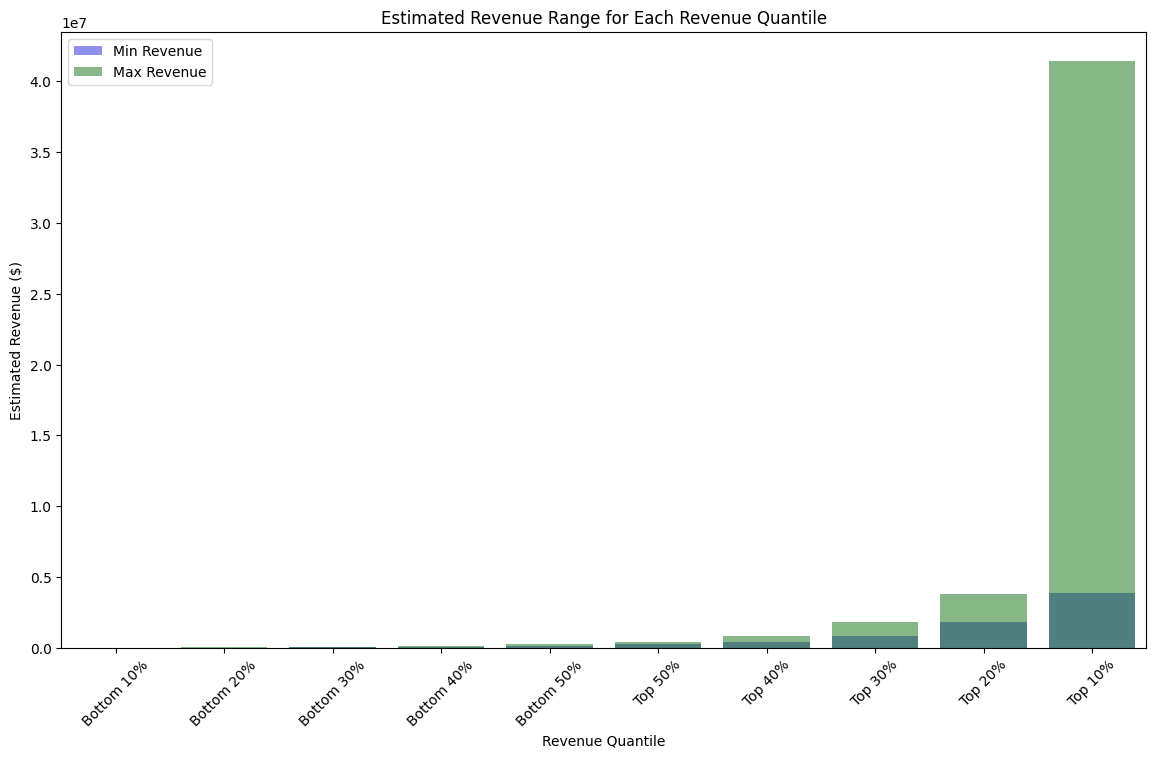

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out games with zero reviews
games_df = games_df[games_df['reviews'] > 0]

# Replace non-numeric values in the owners column with NaN and extract the upper limit of the range
games_df['owners'] = games_df['owners'].str.extract(r'(\d+,*\d*)$')[0].str.replace(',', '').astype(float)

# Drop rows with missing values in owners column
games_df = games_df.dropna(subset=['owners'])
games_df = games_df[games_df['owners'] > 0]

# Calculate the ratio of reviews to downloads
games_df['review_to_download_ratio'] = games_df['reviews'] / games_df['owners']

# Calculate the average review-to-download ratio
average_ratio = games_df['review_to_download_ratio'].mean()
print(f"Average review-to-download ratio: {average_ratio}")

# Use this average ratio to estimate the number of downloads more accurately
games_df['estimated_downloads'] = games_df['reviews'] / average_ratio

# Estimate revenue using the more accurate number of downloads
games_df['estimated_revenue'] = games_df['estimated_downloads'] * games_df['price']

# Calculate revenue quantiles
num_quantiles = 10
quantile_labels = [f"Bottom {i*10}%" for i in range(1, 6)] + [f"Top {i*10}%" for i in range(5, 0, -1)]
games_df['revenue_quantile'] = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=quantile_labels, duplicates='drop')

# Calculate the revenue range for each quantile
revenue_range = games_df.groupby('revenue_quantile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print results for each revenue quantile
print("\nEstimated Revenue Ranges for Each Quantile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_quantile']}: {row['range']}")

# Visualize the results
plt.figure(figsize=(14, 8))
sns.barplot(x=revenue_range['revenue_quantile'], y=revenue_range['min'], color='blue', alpha=0.5, label='Min Revenue')
sns.barplot(x=revenue_range['revenue_quantile'], y=revenue_range['max'], color='green', alpha=0.5, label='Max Revenue')
plt.xlabel('Revenue Quantile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Revenue Quantile')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [39]:
import pandas as pd
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate review quantiles
num_quantiles = 10
quantile_labels = [f"Bottom {i*10}%" for i in range(1, 6)] + [f"Top {i*10}%" for i in range(5, 0, -1)]
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=quantile_labels, duplicates='drop')

# Calculate the revenue range for each quantile
revenue_range = games_df.groupby('review_quantile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quantile:")
for index, row in revenue_range.iterrows():
    print(f"{row['review_quantile']}: {row['range']}")


Average unique review-to-download ratio: 0.01173353
Estimated Revenue Ranges for Each Quantile:
Bottom 10%: $9,800 - $3,999,800
Bottom 20%: $9,800 - $999,800
Bottom 30%: $19,800 - $2,998,000
Bottom 40%: $19,800 - $4,995,000
Bottom 50%: $9,800 - $5,998,000
Top 50%: $49,500 - $12,495,000
Top 40%: $98,000 - $14,990,000
Top 30%: $99,800 - $14,995,000
Top 20%: $398,000 - $99,900,000
Top 10%: $198,000 - $749,500,000


In [40]:
import pandas as pd
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate review quartiles
num_quantiles = 4
quantile_labels = ['Q1', 'Q2', 'Q3', 'Q4']
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=quantile_labels, duplicates='drop')

# Calculate the revenue range for each quartile
revenue_range = games_df.groupby('review_quantile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quartile:")
for index, row in revenue_range.iterrows():
    print(f"{row['review_quantile']}: {row['range']}")


Average unique review-to-download ratio: 0.01173353
Estimated Revenue Ranges for Each Quartile:
Q1: $9,800 - $3,999,800
Q2: $9,800 - $5,998,000
Q3: $49,500 - $14,995,000
Q4: $179,800 - $749,500,000


In [42]:
import pandas as pd
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate revenue quartiles
revenue_quartiles = pd.qcut(games_df['estimated_revenue'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add quartile information to the dataframe
games_df['revenue_quartile'] = revenue_quartiles

# Calculate the revenue range for each quartile
revenue_range = games_df.groupby('revenue_quartile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quartile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_quartile']}: {row['range']}")



Average unique review-to-download ratio: 0.01173353
Estimated Revenue Ranges for Each Quartile:
Q1: $9,800 - $149,500
Q2: $159,800 - $499,000
Q3: $499,500 - $2,495,000
Q4: $2,499,000 - $749,500,000


Average unique review-to-download ratio: 0.01173353
Estimated Revenue Ranges for Each Quartile:
Q1: $9,800 - $149,500
Q2: $159,800 - $499,000
Q3: $499,500 - $2,495,000
Q4: $2,499,000 - $749,500,000


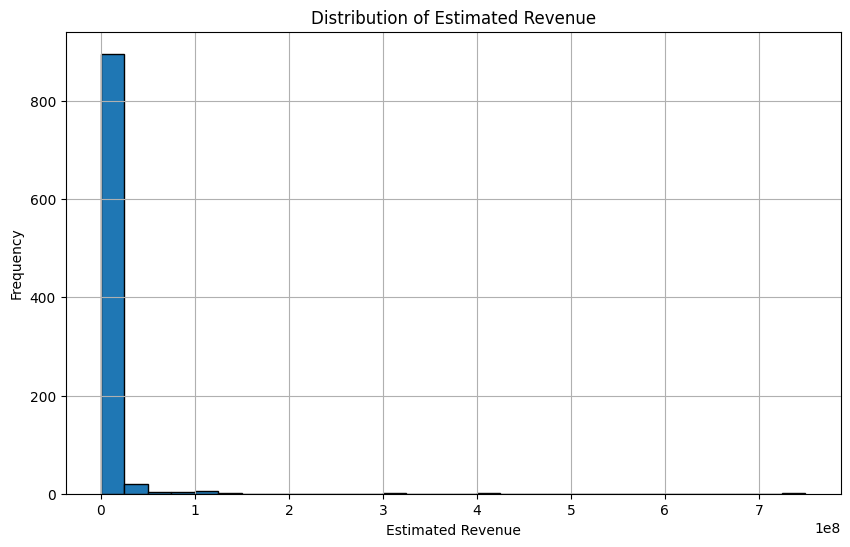

In [43]:
import pandas as pd
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate revenue quartiles
revenue_quartiles = pd.qcut(games_df['estimated_revenue'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add quartile information to the dataframe
games_df['revenue_quartile'] = revenue_quartiles

# Calculate the revenue range for each quartile
revenue_range = games_df.groupby('revenue_quartile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quartile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_quartile']}: {row['range']}")

# Visualize the distribution of estimated revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(games_df['estimated_revenue'], bins=30, edgecolor='black')
plt.xlabel('Estimated Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Revenue')
plt.grid(True)
plt.show()


Average unique review-to-download ratio: 0.01173353
Estimated Revenue Ranges for Each Quartile:
Q1: $9,800 - $149,500
Q2: $159,800 - $499,000
Q3: $499,500 - $2,495,000
Q4: $2,499,000 - $749,500,000


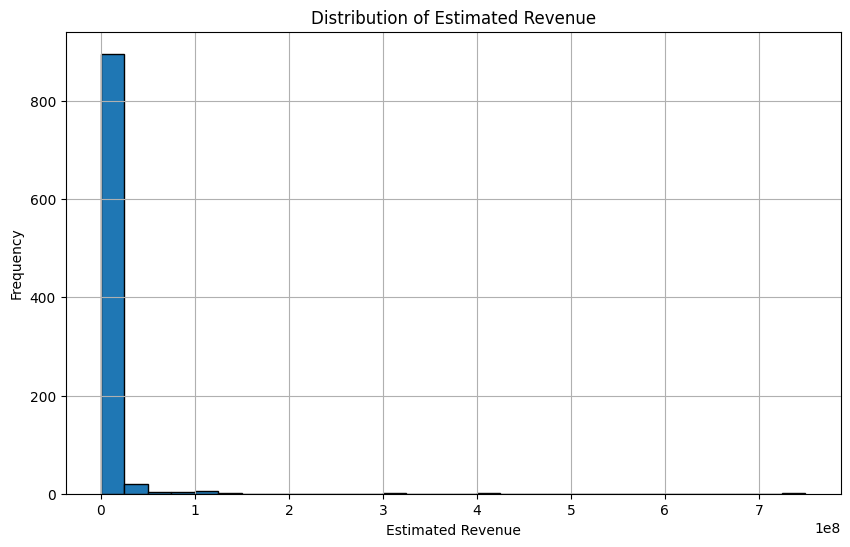

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate revenue quartiles
revenue_quartiles = pd.qcut(games_df['estimated_revenue'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add quartile information to the dataframe
games_df['revenue_quartile'] = revenue_quartiles

# Calculate the revenue range for each quartile
revenue_range = games_df.groupby('revenue_quartile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quartile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_quartile']}: {row['range']}")

# Visualize the distribution of estimated revenue
plt.figure(figsize=(10, 6))
plt.hist(games_df['estimated_revenue'], bins=30, edgecolor='black')
plt.xlabel('Estimated Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Revenue')
plt.grid(True)
plt.show()

